Задание 1

Базово изучите датасет “happines_corruption.csv” (достаточно методов info() и describe()).
Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
Желательно, но не обязательно:
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

In [20]:
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_happines = pd.read_csv('happines_corruption.csv')
df_happines.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [4]:
df_happines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


Нет пропусков в данном датасете. Все типы данных по столбцам согласованы.

In [5]:
df_happines.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


По описательной статистике видно, что большинство показателей имеют сбалансированное распределение без экстремальных значений, однако для точной оценки нормальности и наличия выбросов требуется дополнительный анализ 

Выдвинутые гипотезы:
1) Является уровень счастья выше в странах Европы, чем в странах Афирики?
2) Есть ли взаимосвязь между уровнем счастья и степенью влияния на это счастье семьи?

In [15]:
# Проверка первой гипотезы
# формируем 2 выборки, где 1 - по странам Европы, а вторая  - по странам Африки 
df_europe = df_happines.loc[df_happines['continent'] == 'Europe']['happiness_score'].values
df_africa = df_happines.loc[df_happines['continent'] == 'Africa']['happiness_score'].values
df_africa

array([5.87200022, 5.62900019, 5.5250001 , 5.23500013, 5.07399988,
       4.829     , 4.80499983, 4.73500013, 4.70900011, 4.69500017,
       4.55299997, 4.53499985, 4.51399994, 4.46500015, 4.46000004,
       4.29199982, 4.19000006, 4.11999989, 4.08099985, 4.03200007,
       4.02799988, 3.97000003, 3.93600011, 3.875     , 3.76600003,
       3.65700007, 3.64400005, 3.53299999, 3.49499989, 3.47099996,
       3.34899998, 2.90499997, 5.754     , 5.605     , 5.477     ,
       5.268     , 5.129     , 5.013     , 4.739     , 4.642     ,
       4.633     , 4.61      , 4.571     , 4.512     , 4.507     ,
       4.436     , 4.419     , 4.332     , 4.292     , 4.252     ,
       4.194     , 3.995     , 3.931     , 3.904     , 3.896     ,
       3.845     , 3.781     , 3.681     , 3.667     , 3.587     ,
       3.465     , 3.34      , 2.905     , 2.839     , 5.888     ,
       5.525     , 5.265     , 5.211     , 5.208     , 5.044     ,
       4.996     , 4.883     , 4.799     , 4.722     , 4.681  

In [16]:
# Проверяем нормальность распределения наших выборок
stat_e, p_e = st.shapiro(df_europe)
stat_a, p_a = st.shapiro(df_africa)

if p_e > 0.05 and p_a > 0.05:
    print('Вероятно, обе выборки имеют нормальное распределение')
else:
    print('Вероятно, хотя бы одна выборка имеет ненормальное распределение')

Вероятно, хотя бы одна выборка имеет ненормальное распределение


In [35]:
# т.к. у нас есть ненормальное распределение, то используем критерий Манна-Уитни для сравнения 2-х выборок
stat, p = st.mannwhitneyu(df_europe, df_africa, alternative='greater')

if p > 0.05:
    print('Нет достаточных оснований утверждать, что уровень счастья в Европе выше, чем в Африке.')
else:
    print('Уровень счастья в странах Европы статистически значимо выше, чем в странах Африки.')

Уровень счастья в странах Европы статистически значимо выше, чем в странах Африки.


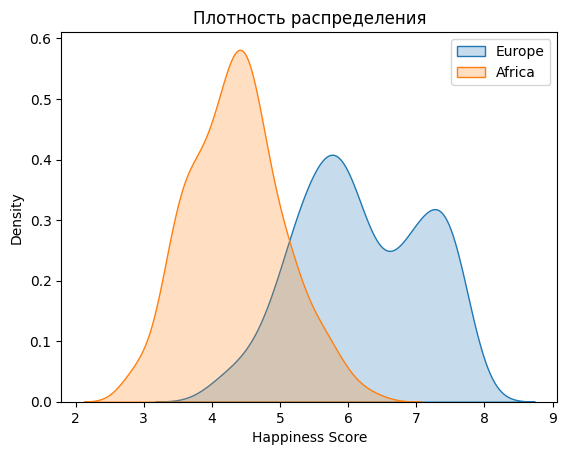

In [41]:
sns.kdeplot(df_europe, label = 'Europe', fill = True)
sns.kdeplot(df_africa, label = 'Africa', fill = True)
plt.xlabel('Happiness Score')
plt.title('Плотность распределения')
plt.legend()
plt.show()

На основе графика можно заключить, что уровень счастья в странах Европы статистически значимо выше, чем в странах Африки, т.к. в
последних чаще всего уровень счастя примерно в районе 4,5 находится, а в странах Европы чаще встречается уровень счастья на отметке около 5.7 - 6.

In [36]:
# Проверка второй гипотезы
# Проверяем распределение столбца 'family' и столбца 'happiness_score'
stat_f, p_f = st.shapiro(df_happines['family'])
stat_h, p_h = st.shapiro(df_happines['happiness_score'])

if p_f > 0.05 and p_h > 0.05:
    print('Обе выборки име.т нормальное распределение')
else:
    print('Хотя бы одна выборка имеет ненормальное распределение')

Хотя бы одна выборка имеет ненормальное распределение


In [37]:
# т.к. у нас есть ненормальное распределение, то мы используем критерий спирмана для выявления наличия корреляции
corr, p_val = st.spearmanr(df_happines['family'], df_happines['happiness_score'])

if p_val < 0.05:
    print('Влияние семьи положительно связана с уровнем счастья')
else:
    print('Связь между влиянием семьи и уровнем счастья не подтверждена')

Влияние семьи положительно связана с уровнем счастья


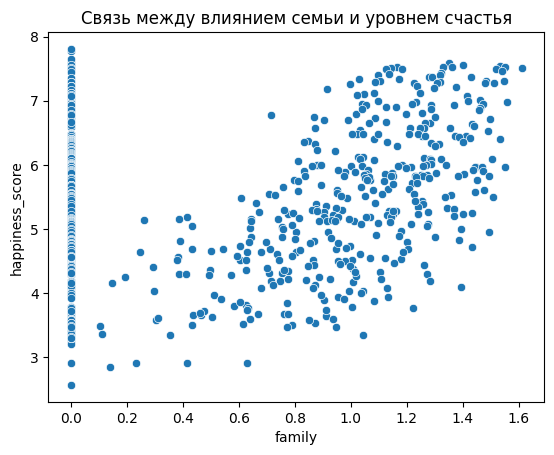

Коэффициент корреляции Спирмена: 0.140


In [50]:
sns.scatterplot(data=df_happines, x='family', y='happiness_score')
plt.title('Связь между влиянием семьи и уровнем счастья')
plt.show()
print(f"Коэффициент корреляции Спирмена: {corr:.3f}")

Вывод по второй гипотезе: т.к. на графике мы наблюдаем положительную линейную связь, а коэффициент спирмена = 0.14 (т.е. слабый), то можно сказать, что есть связь между влиянием семьи и уровнем счастья. 

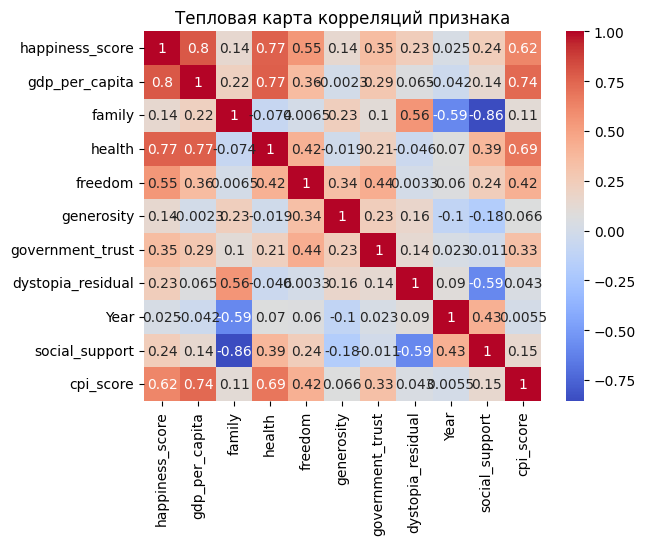

In [51]:
# Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.
# Используем метод Спирмана, т.к. у нас есть ненормальные распределения
df_hap = df_happines.drop(columns = ['Country', 'continent'], axis = 1)
correlation_matrix = df_hap.corr(method='spearman')

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Тепловая карта корреляций признака')
plt.show()

Ориентируясь на теплову карту, можно сказать, что положительная линейная сильная связь существует между уровнем счастья и уровнем ВВП, самая слабоположительная линейная связь между уровнем счастья и влиянием семьи.

Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия.

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

Оставьте только два столбца:'Temperature' и 'Sum'.
Постройте диаграмму рассеяния.
Постройте модель линейной регрессии для выбранных признаков.
Рассчитайте точность модели на тестовой выборке.
Выведите график остатков.


In [52]:
df_gas = pd.read_csv('gas_sales_data.csv')
df_gas.head()

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [56]:
df_gas = df_gas[['Temperature', 'Sum']]
df_gas.head()

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248


In [57]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  252 non-null    float64
 1   Sum          252 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


Пропусков в данных нет, типа данных соответствуют в столбцах

In [60]:
df_gas.describe().round(2)

,Temperature,Sum
count,252.00,252.00
mean,13.37,1666574.03
std,9.54,796576.17
min,-5.74,451322.00
25%,4.66,1094284.00
50%,14.32,1436071.50
75%,22.26,2226305.75
max,28.56,3748910.00


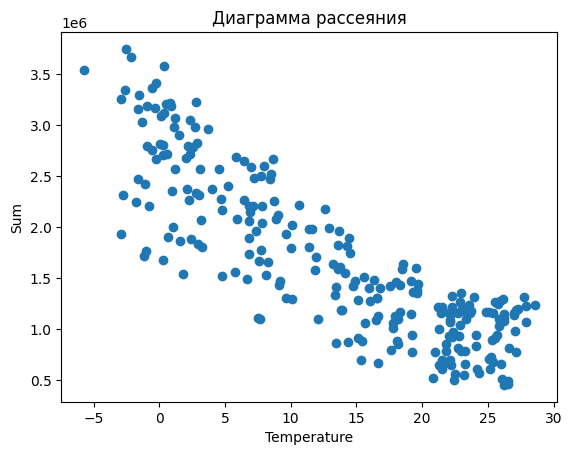

In [68]:
# строим диаграмму рассеяния
plt.scatter(data = df_gas, x = 'Temperature', y = 'Sum')
plt.title('Диаграмма рассеяния')
plt.xlabel('Temperature')
plt.ylabel('Sum')
plt.show()

Опираясь на график, можно сказать, что между данными показателями имеется линейная сильная отрицательная связь

In [81]:
# Построение модели
# Подготовка выборок для модели
x = df_gas[['Temperature']]
y = df_gas['Sum']

In [98]:
# Делим выборку на тестовую и тренировочную
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [83]:
# Импорт линейной регрессии
# Обучение модели
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
# Делаем прогноз на тестовой выборке
predictions = lr.predict(x_test)
print(lr.coef_)
print(lr.intercept_)

[-69215.51486225]
2576468.0184901506


Мы получили коэффициенты линейного уравнения и теперь можем их подставить в наш пример:
y = 2576468 - 69215 * tempreture

In [95]:
# Оценка модели с помощью коэффициента детерминации
r2 = lr.score(x_test, y_test)
print(f"Коэффициент детерминации на тестовой выборке: {r2:.2f}")

Коэффициент детерминации на тестовой выборке: 0.76


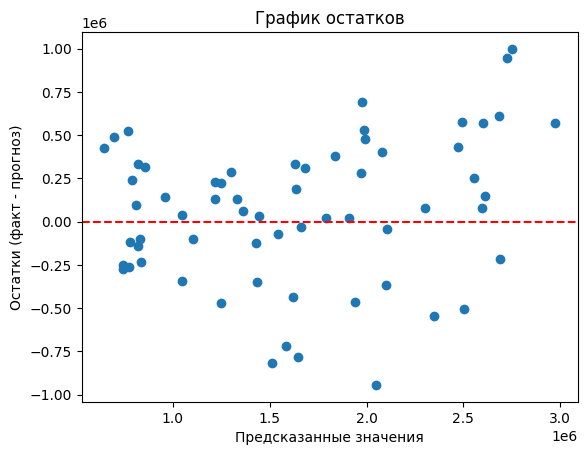

In [97]:
# Строим график остатков
residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки (факт - прогноз)')
plt.title('График остатков')
plt.show()

В целом, остатки концентрируются возле 0 по графику, а значит, эта модель построена хорошо

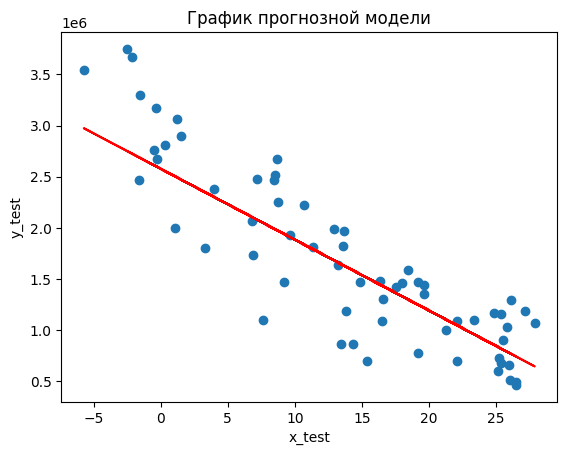

In [91]:
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions, c = 'r')
plt.title('График прогнозной модели')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

По оценке модели мы получили коэфиициент 0.76, он близок к 1, а значит модель построена хороша. При построении графика прогнозной модели мы также наблюдаем, что он схож с графиком исходных данных и имеет сильную отрицательную линейную связь. На этом омновании мы можем ответить, что при повышении температуры в стране снижается потребление газа. 